# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


sinasc_raw = pd.read_csv('sinasc_RO_2019.csv')
sinasc_raw.shape

(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [20]:
bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
sinasc_raw['cat_APGAR5'] = pd.cut(sinasc_raw['APGAR5'], bins = bins, labels = labels)
print(sinasc_raw['cat_APGAR5'].value_counts())

cat_APGAR5
normal              26463
asfixia leve          320
asfixia moderada       68
asfixia grave          57
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

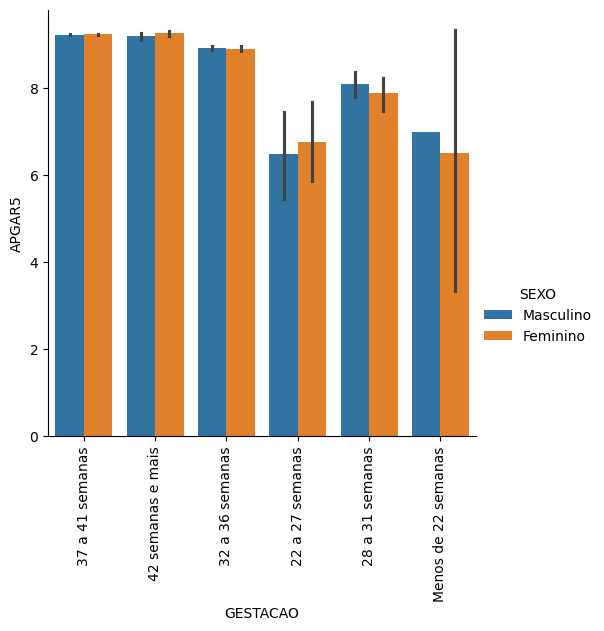

In [36]:
fig = sns.catplot(x = 'GESTACAO', y = 'APGAR5', hue = 'SEXO', kind = 'bar', data = sinasc_raw)
fig.set_xticklabels(rotation = 90)


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [42]:
cross_ap5gest = pd.crosstab(sinasc_raw['GESTACAO'],sinasc_raw['APGAR5'])
print(cross_ap5gest)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [52]:
cross_ap5gest_pctlin = cross_ap5gest.div(cross_ap5gest.sum(axis = 1), axis = 0)
cross_ap5gest_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

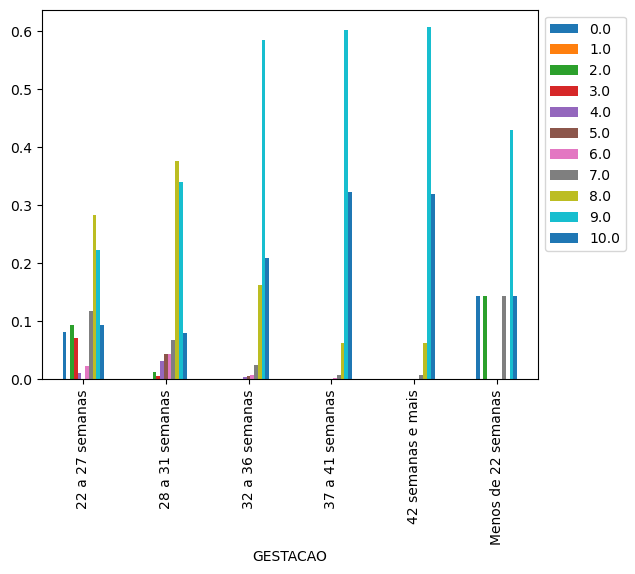

In [74]:
ax = cross_ap5gest_pctlin.plot.bar()

ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))

Podemos reparar que a dominância do apgar-5 alto é completamente suprimida conforme o tempo de gestação se distancia da faixa ideal (37 a 41 semanas). No entanto, uma coisa curiosa ocorre: a faixa de 22 a 17 semanas apresenta um APGAR-5 aparentemente pior do que a faixa de menos de 22 semanas! A causa deste fenômeno podem ser diversas, como, por exemplo, os casos de prematuridade com menos de 22 semanas podem ser premeditados, enquanto os de 22 a 27 espontâneos, ou talvez, algum fator biológico a respeito do desenvolvimento do feto cause este "gap" inesperado que estamos visualizando, e que tira a linearidade da proporcionalidade entre bons resultados de apgar-5 e proximidade com a faixa ideal...

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

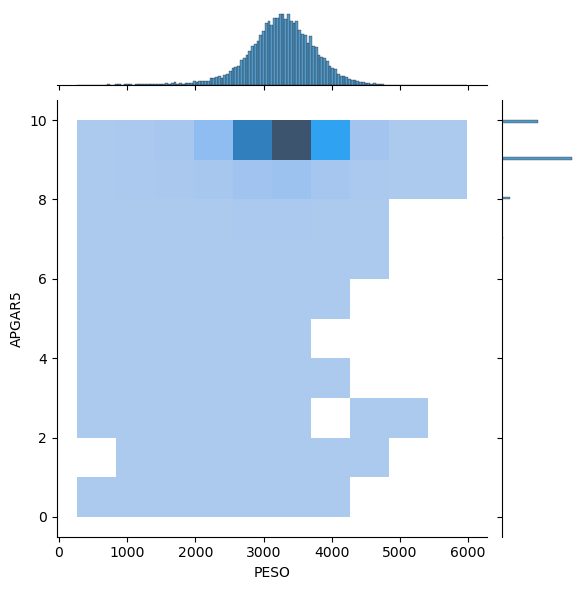

In [106]:
sns.jointplot(x='PESO', y = 'APGAR5', data = sinasc_raw, kind = 'hist', bins = [10,10])

Este histograma 2D parece ser o mais apropriado para nos mostrar que a nossa concentração de um bom APGAR-5 parece estar exremamente cocentrada na faixa do que parece ser 3.300 gramas de peso do bebê, enquanto que o distanciamento deste peso ideal parece implicar em redução significativa do índice mais provável de APGAR-5. No entanto, bebês um pouco mais pesados, não parecem ter discrepância tão significativa, apresentando, via de regra, um apgar também concentrado acima de 8. Como podemos notar, na faixa por exemplo dos 5000